# Continuous Random Variables

## Learning Goals

1. Be able to give examples of what uniform, exponential and normal distributions are used to model.
2. Be able to give the range and pdf's of uniform, exponential and normal distributions.

## Introduction

Here we introduce a few fundamental continuous distributions. These will play important roles in the statistics part of the class. For each distribution, we give the range, the pdf, the cdf, and a short description of situations that it models. These distributions all depend on parameters, which we specify.

As you look through each distribution do not try to memorize all the details; you can always look those up. Rather, focus on the shape of each distribution and what it models.

Although it comes towards the end, we call your attention to the normal distribution. It is easily the most important distribution defined here.

## Uniform distribution
1. Parameters: $a, b$.
2. Range: $[a, b]$.
3. Notation: uniform $(a, b)$ or $\mathrm{U}(a, b)$.
4. Density: $f(x)=\frac{1}{b-a}$ for $a \leq x \leq b$.
5. Distribution: $\quad F(x)=(x-a) /(b-a)$ for $a \leq x \leq b$
6. Models: All outcomes in the range have equal probability (more precisely all outcomes have the same probability density).

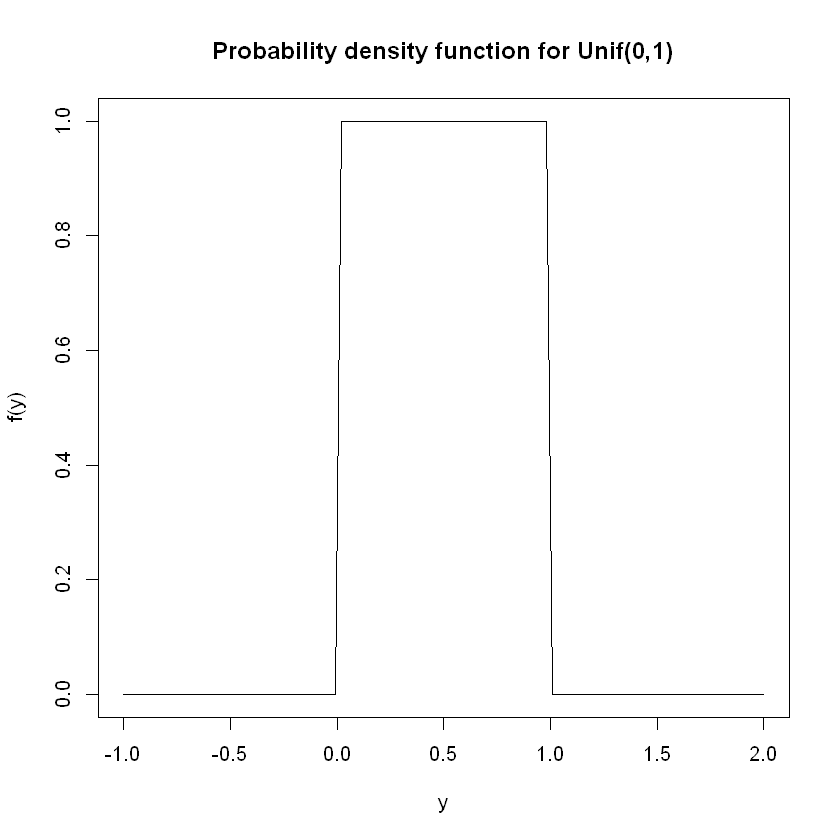

In [1]:
a <- 0
b <- 1

# The curve function expects you to give a function of `x` and then it 
# (internally) creates a sequence of values from `from` and to `to` and creates
# plots similar to what we had before, but using a line rather than points.
curve(dunif(x, min = a, max = b), from = -1, to = 2,
      xlab='y', ylab='f(y)', main='Probability density function for Unif(0,1)')

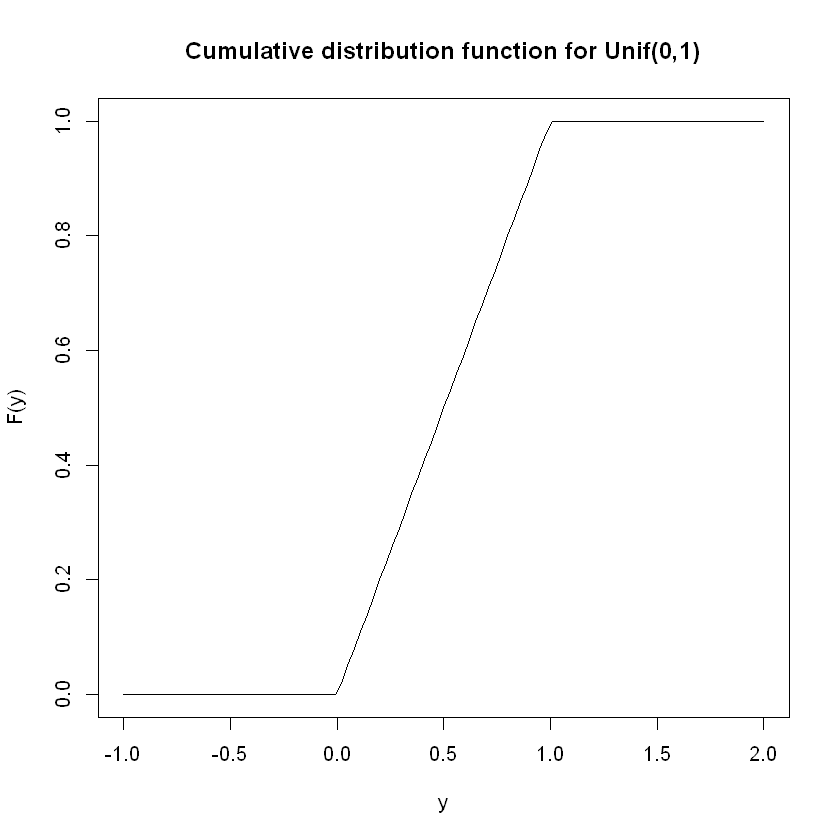

In [2]:
curve(punif(x, min = a, max = b), from = -1, to = 2,
      xlab='y', ylab='F(y)', main='Cumulative distribution function for Unif(0,1)')

\begin{exercise}
1. Suppose we have a tape measure with markings at each millimeter. If we measure (to the nearest marking) the length of items that are roughly a meter long, the rounding error will uniformly distributed between -0.5 and 0.5 millimeters.
2. Many boardgames use spinning arrows (spinners) to introduce randomness. When spun, the arrow stops at an angle that is uniformly distributed between 0 and $2 \pi$ radians.
3. In most pseudo-random number generators, the basic generator simulates a uniform distribution and all other distributions are constructed by transforming the basic generator.
\end{exercise}



## Exponential distribution

1. Parameter: $\lambda$.
2. Range: $[0, \infty)$.
3. Notation: exponential $(\lambda)$ or $\exp (\lambda)$.
4. Density: $f(x)=\lambda \mathrm{e}^{-\lambda x}$ for $0 \leq x$
5. Distribution: (easy integral)
$$
F(x)=1-\mathrm{e}^{-\lambda x} \text { for } x \geq 0
$$
6. Right tail distribution: $P(X>x)=1-F(x)=\mathrm{e}^{-\lambda x}$.
7. Models: The waiting time for a continuous process to change state.

\begin{example}
If I step out to 77 XYZ Ave after class and wait for the next taxi, my waiting time in minutes is exponentially distributed. We will see that in this case $\lambda$ is given by one over the average number of taxis that pass per minute (on weekday afternoons).

\end{example}

\begin{remark}
**Memorylessness**: There are other distributions that also model waiting times, but the exponential distribution has the additional property that it is memoryless. Here's what this means in the context of Example $1 .$ Suppose that the probability that a taxi arrives within the first five minutes is $p .$ If $\mathrm{I}$ wait five minutes and in fact no taxi arrives, then the probability that a taxi arrives within the next five minutes is still $p$.
\end{remark}



## Normal distribution

In $1809,$ Carl Friedrich Gauss published a monograph introducing several notions that have become fundamental to statistics: the normal distribution, maximum likelihood estimation, and the method of least squares. For this reason, the normal distribution is also called the Gaussian distribution, and it the most important continuous distribution.

1. Parameters: $\mu, \sigma$.
2. Range: $(-\infty, \infty)$.
3. Notation: $\operatorname{normal}\left(\mu, \sigma^{2}\right)$ or $N\left(\mu, \sigma^{2}\right)$.
4. Density: $f(x)=\frac{1}{\sigma \sqrt{2 \pi}} \mathrm{e}^{-(x-\mu)^{2} / 2 \sigma^{2}}$
5. Distribution: $F(x)$ has no formula, so use tables or software such as `pnorm` in $\mathrm{R}$ to compute $F(x)$
6. Models: Measurement error, intelligence/ability, height, averages of lots of data.

The **standard normal distribution** $N(0,1)$ has mean 0 and variance $1 .$ We reserve $Z$ for a standard normal random variable, $\phi(z)=\frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-x^{2} / 2}$ for the standard normal density, and $\Phi(z)$ for the standard normal distribution.

Note: we will define mean and variance for continuous random variables next time. They have the same interpretations as in the discrete case. As you might guess, the normal distribution $N\left(\mu, \sigma^{2}\right)$ has mean $\mu,$ variance $\sigma^{2},$ and standard deviation $\sigma$

Here are some graphs of normal distributions. Note they are shaped like a bell curve. Note also that as $\sigma$ increases they become more spread out.

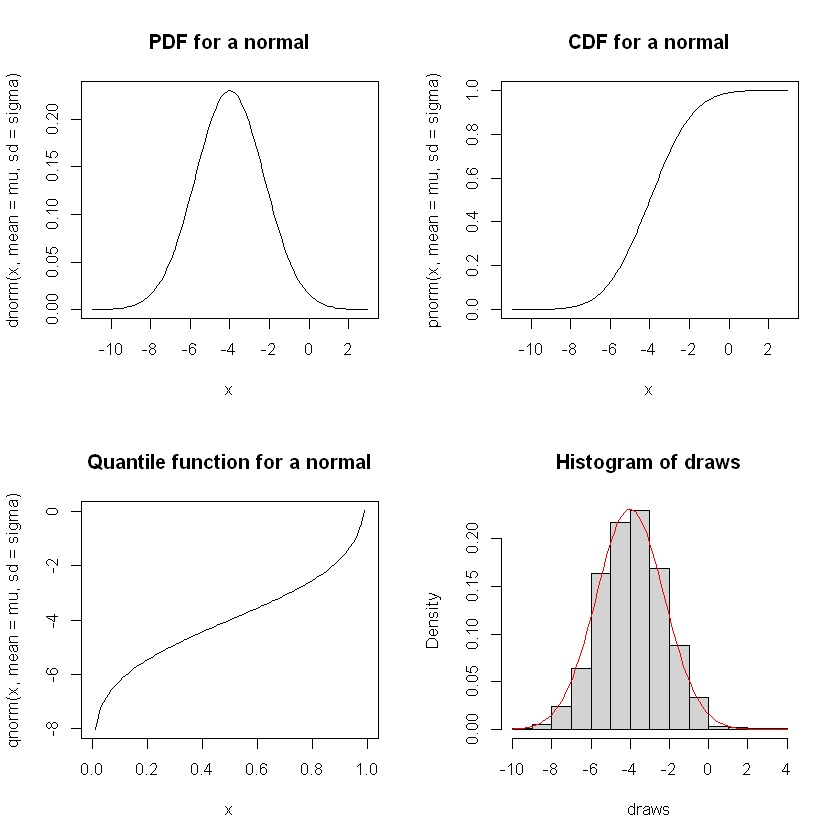

In [3]:
mu    <- -4
sigma <- sqrt(3) # standard deviation!!!

opar = par(mfrow=c(2,2))
curve(dnorm(x, mean = mu, sd = sigma), 
      from = mu-4*sigma, to = mu+4*sigma,
      main = "PDF for a normal")

curve(pnorm(x, mean = mu, sd = sigma), 
      from = mu-4*sigma, to = mu+4*sigma,
      main = "CDF for a normal")

curve(qnorm(x, mean = mu, sd = sigma),
      from = 0, to = 1, 
      main = "Quantile function for a normal")

draws <- rnorm(999, mean = mu, sd = sigma)
hist(draws, probability = TRUE)
curve(dnorm(x, mean = mu, sd = sigma), add = TRUE, col = "red")


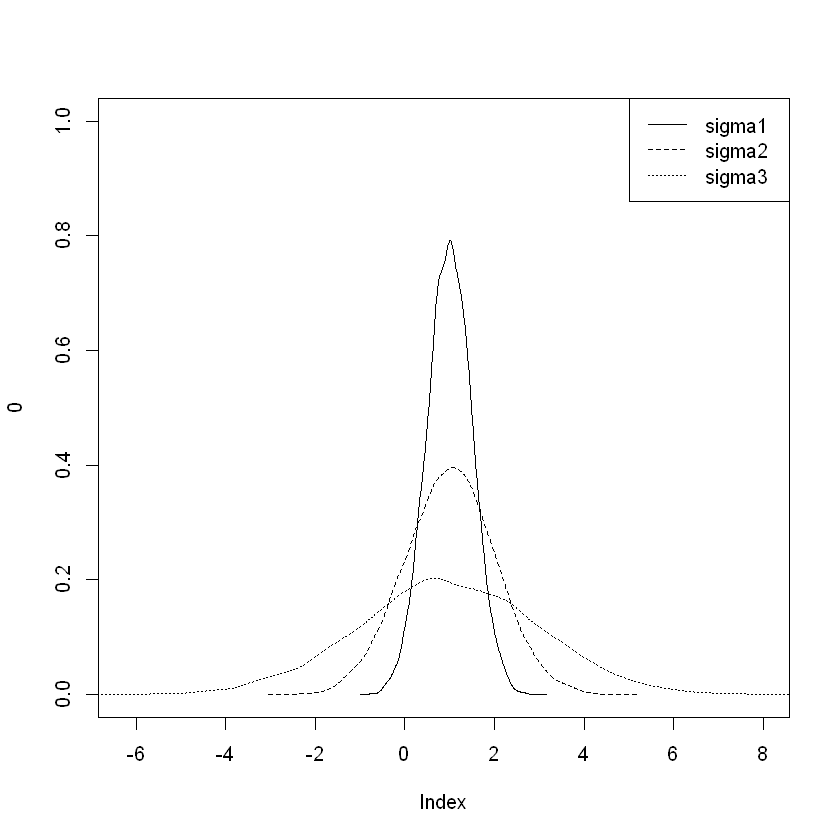

In [14]:
dat <- read.table(text = "info mean sd
sigma1 1. 0.5
sigma2 1. 1.
sigma3 1. 2.
", header = TRUE)

densities <- apply(dat[, -1], 1, function(x) rnorm(n = 10000, mean = x[1], sd = x[2]))
colnames(densities) <- dat$info

plot(0, type = "n", xlim = c(min(densities), max(densities)), ylim = c(0, 1.))
for (d in 1:ncol(densities)){
  lines(density(densities[, d]), lty = d)
}
legend("topright", legend=colnames(densities), lty=1:ncol(densities))

## Plot multiple graphs in R

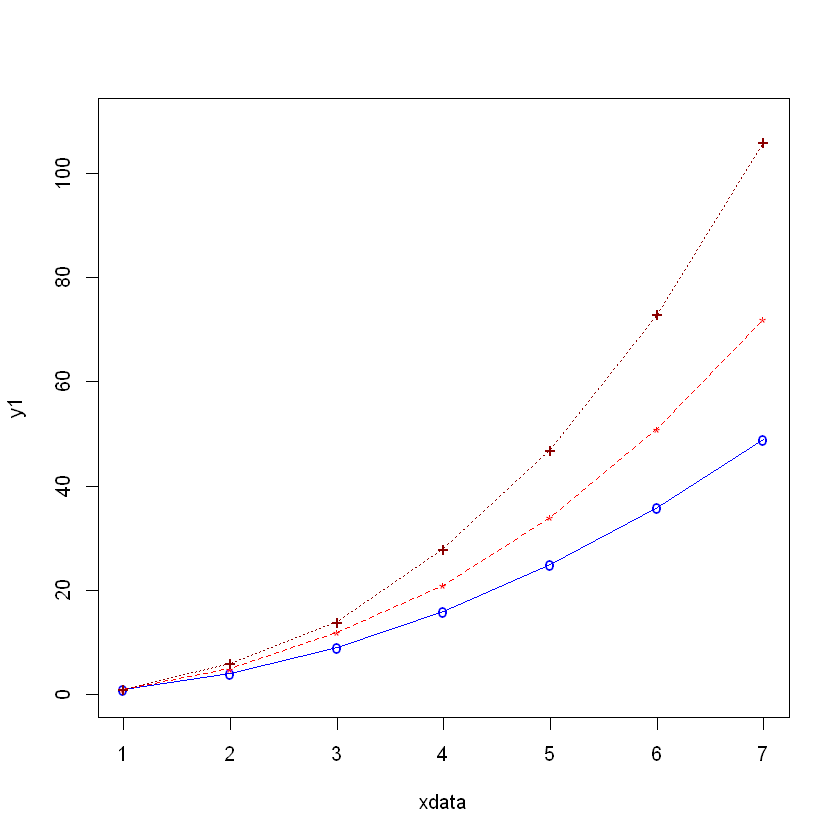

In [7]:
# define 3 data sets
 xdata <- c(1,2,3,4,5,6,7)
 y1 <- c(1,4,9,16,25,36,49)
 y2 <- c(1, 5, 12, 21, 34, 51, 72)
 y3 <- c(1, 6, 14, 28, 47, 73, 106 )

# plot the first curve by calling plot() function
# First curve is plotted
 plot(xdata, y1, type="o", col="blue", pch="o", lty=1, ylim=c(0,110) )

# Add second curve to the same plot by calling points() and lines()
# Use symbol '*' for points.
 points(xdata, y2, col="red", pch="*")
 lines(xdata, y2, col="red",lty=2)

# Add Third curve to the same plot by calling points() and lines()
# Use symbol '+' for points.
 points(xdata, y3, col="dark red",pch="+")
 lines(xdata, y3, col="dark red", lty=3)


## Normal probabilities
To make approximations it is useful to remember the following rule of thumb for three approximate probabilities 

$P(-1 \leq Z \leq 1) \approx .68, \quad P(-2 \leq Z \leq 2) \approx .95, \quad  P(-3 \leq Z \leq 3) \approx .99$

![npdf](normalPDF.png)

### Display the density of  the normal distribution with various standard deviations  

\begin{remark}
The R function pnorm $(x, \mu, \sigma)$ uses $\sigma$ whereas our notation for the normal distribution $\mathrm{N}\left(\mu, \sigma^{2}\right)$ uses $\sigma^{2}$
\end{remark}


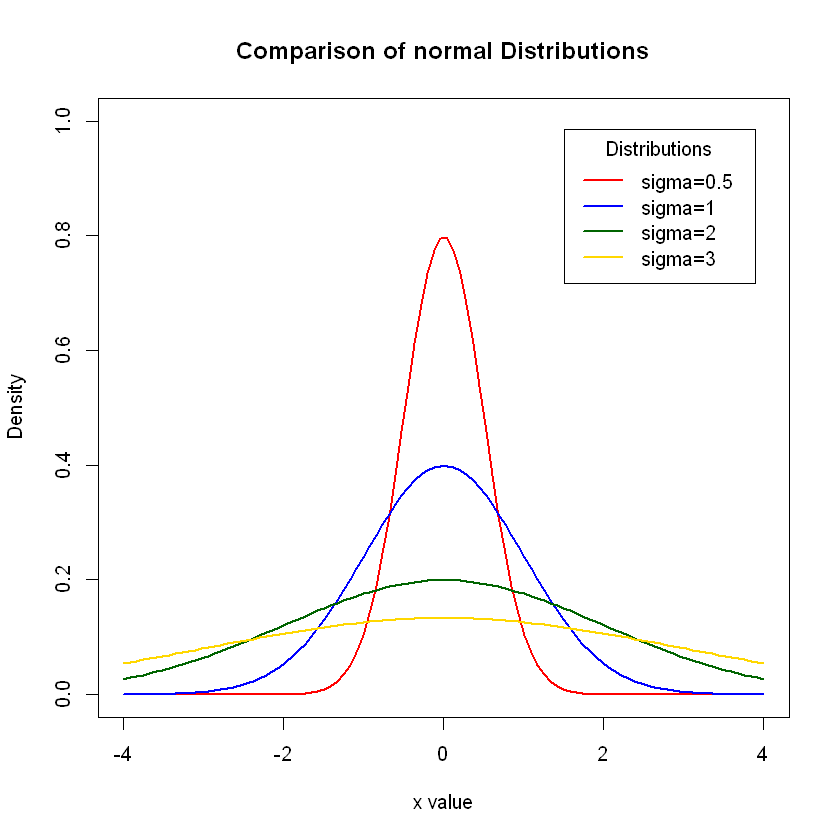

In [31]:
# Display the density of  the normal distribution with various
# standard deviations  

x <- seq(-4, 4, length=100)
hx <- dnorm(x)

degf <- c(0.5, 1, 2, 3)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("sigma=0.5", "sigma=1", "sigma=2", "sigma=3")

plot(x, hx, type="l", lty=2, xlab="x value",
  ylab="Density", main="Comparison of normal Distributions for different sigma",ylim = c(0,1))

for (i in 1:4){
  lines(x, dnorm(x,0,degf[i]), lwd=2, col=colors[i])
}

legend("topright", inset=.05, title="Distributions",
  labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)

## Chi-squared Distribution

If $X_{1}, X_{2}, \ldots, X_{m}$ are $m$ independent random variables having the standard normal distribution,
then the following quantity follows a Chi-Squared distribution with $df$ degrees of freedom.
Its mean is $df,$ and its variance is $2 df$.
$$
V=X_{1}^{2}+X_{2}^{2}+\cdots+X_{df}^{2} \sim \chi_{(df)}^{2}
$$

The chi-squared distribution with df degrees of freedom is the distribution of the sums of the squares of df independent standard normal random variables.
The chi-squared distribution is positively skewed with values between 0 and $\infty$. The mean is $\mu=d f$ and the variance is $\sigma=2 d f$. When $d f>=2,$ the maximum occurs at $\chi_{n}^{2}=(n-1)-2 .$ As $n \rightarrow \infty$, the distribution approaches normal. The chi-square distribution is heavily skewed right, so calculate an upper and lower $\chi_{d f}^{2}$ to create confidence intervals.

**R Functions dchisq, pchisq, qchisq, and rchisq**

R function dchisq(x, df) is the probability of $\chi^{2}$ equalling $x$ when the degrees of freedom is df . 

R function pchisq(q, sd, lower.tail) is the cumulative probability ( lower.tail = TRUE for left tail, lower.tail = FALSE for right tail) of less than or equal to value
q. 

R function rchisq(n, df) returns $n$ random numbers from the chi-square distribution. 

R function $\operatorname{qchis} q(p,$ df, lower.tail) is the value of $x$ at the $q$ th percentile ( lower.tail = TRUE ).

The chi-squared distribution has numerous applications. The Chi-squared test of population variance tests the likelihood of a hypothesized population variance. The Chi-squared goodness of fit test tests goodness of fit in categorical data analysis, and the Chi-square test of independence tests independence.




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




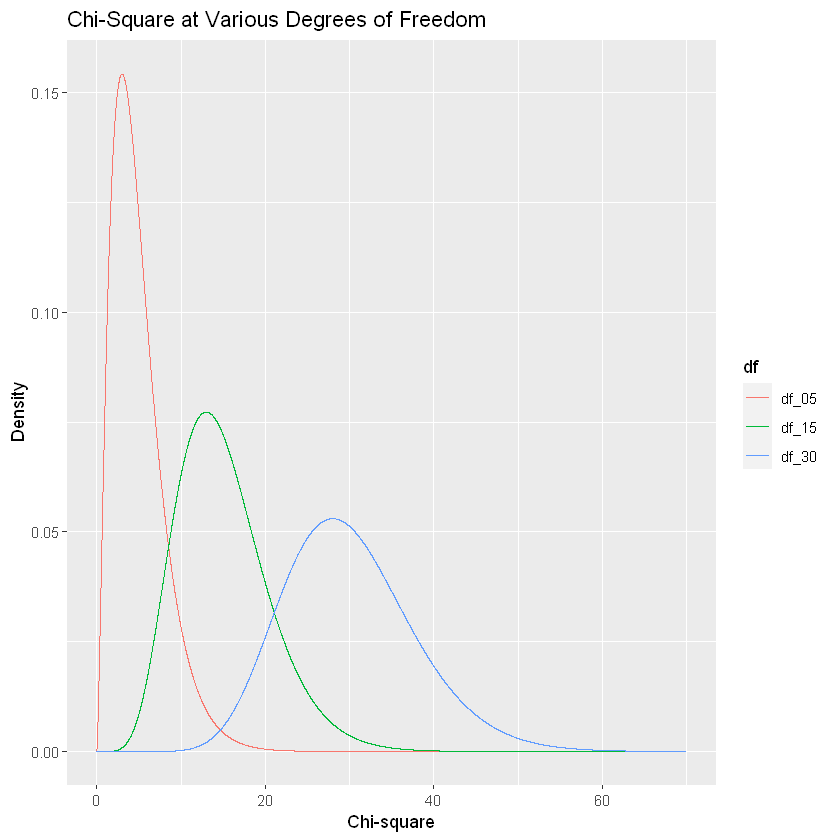

In [33]:
library(dplyr)
library(ggplot2)
library(tidyr)

data.frame(chisq = 0:7000 / 100) %>% 
           mutate(df_05 = dchisq(x = chisq, df = 5),
                  df_15 = dchisq(x = chisq, df = 15),
                  df_30 = dchisq(x = chisq, df = 30)) %>%
  gather(key = "df", value = "density", -chisq) %>%
ggplot() +
  geom_line(aes(x = chisq, y = density, color = df)) +
  labs(title = "Chi-Square at Various Degrees of Freedom",
       x = "Chi-square",
       y = "Density") 


## Student t Distribution

The t distribution (also called Student’s t Distribution) is a family of distributions that look almost identical to the normal distribution curve, only a bit shorter and fatter. The t distribution is used instead of the normal distribution when you have small samples. The larger the sample size, the more the t distribution looks like the normal distribution. In fact, for sample sizes larger than 20 (e.g. more degrees of freedom), the distribution is almost exactly like the normal distribution.


**Description**
Density, distribution function, quantile function and random generation for the t distribution with df degrees of freedom (and optional non-centrality parameter ncp).

Usage

    dt(x, df, ncp, log = FALSE)
    pt(q, df, ncp, lower.tail = TRUE, log.p = FALSE)
    qt(p, df, ncp, lower.tail = TRUE, log.p = FALSE)
    rt(n, df, ncp)
**Arguments**

        x, q	vector of quantiles.
        p	vector of probabilities.
        n	number of observations. If length(n) > 1, the length is taken to be the number required.
        df	degrees of freedom (> 0, maybe non-integer). df = Inf is allowed. For qt only values of at least one are currently supported.
        ncp	non-centrality parameter delta; currently except for rt(), only for abs(ncp) <= 37.62. If omitted, use the central t distribution.
        log, log.p	logical; if TRUE, probabilities p are given as log(p).
        lower.tail	logical; if TRUE (default), probabilities are P[X <= x], otherwise, P[X > x].

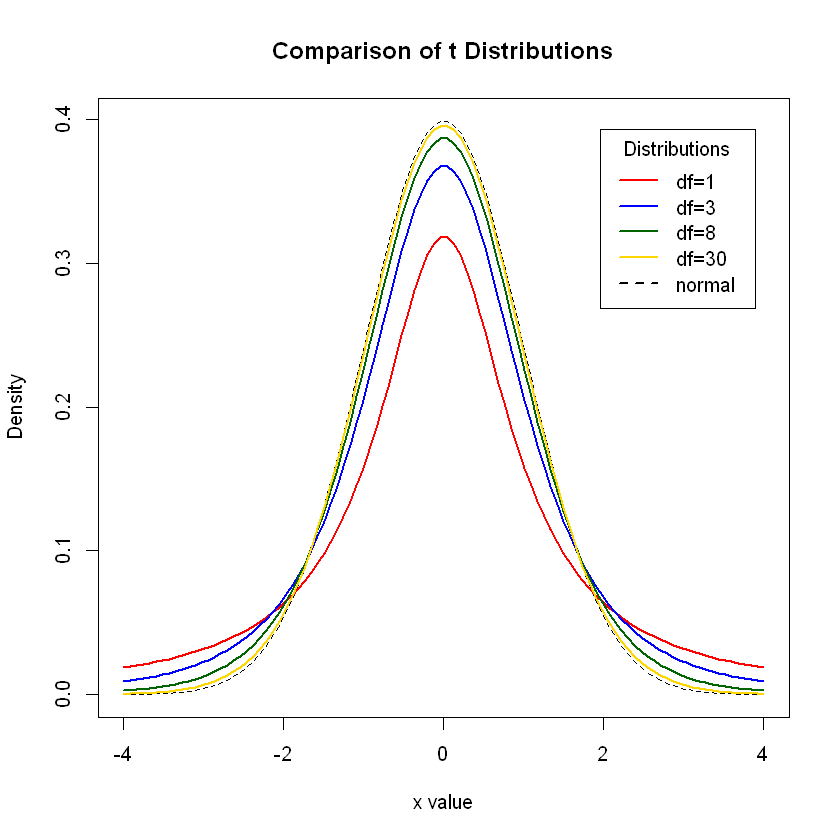

In [32]:
# Display the Student's t distributions with various
# degrees of freedom and compare to the normal distribution

x <- seq(-4, 4, length=100)
hx <- dnorm(x)

degf <- c(1, 3, 8, 30)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=8", "df=30", "normal")

plot(x, hx, type="l", lty=2, xlab="x value",
  ylab="Density", main="Comparison of t Distributions")

for (i in 1:4){
  lines(x, dt(x,degf[i]), lwd=2, col=colors[i])
}

legend("topright", inset=.05, title="Distributions",
  labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)

## $\mathrm{F}$ -distribution

The $\mathrm{F}$ distribution is the ratio of two scaled chi-square distributions $W_{1}$ and $W_{2}$ with degrees of freedom $d f_{1}$ and $d f_{2}$.

$$F=\frac{W_{X} / d f_{X}}{W_{Y} / d f_{Y}}$$

The $\mathrm{F}$ statistic may also be written

$$F=\frac{s_{X}^{2} / \sigma_{X}^{2}}{s_{Y}^{2} / \sigma_{Y}^{2}}=\frac{s_{X}^{2} / s_{Y}^{2}}{\sigma_{X}^{2} / \sigma_{Y}^{2}}$$

Like the chi-square distribution, the $\mathrm{F}$ distribution contains only positive values and is non symmetrical. There is an $\mathrm{F}$ distribution for each degree of freedom associated with $s_{A}^{2}$ and $s_{B}^{2}$

### R Functions df, pf, qf, and rf

R function $\mathrm{d} f(x, d f 1, d f 2)$ is the probability of $F$ equalling $x$ when the degrees of freedom are $d f 1$ and $d f 2 .$ 

R function $\mathrm{pf}(\mathrm{q}, \mathrm{df} 1,$ df2, lower.tail $)$ is the cumulative probability ( lower.tail = TRUE for left tail, lower.tail = FALSE for right tail) of less than or
n random numbers from the F distribution.

The F distribution has numerous applications. The $\mathrm{F}$ test is used in to test whether two distributions are equivalent $H_{0}: \sigma_{A}^{2}=\sigma_{B}^{2}$

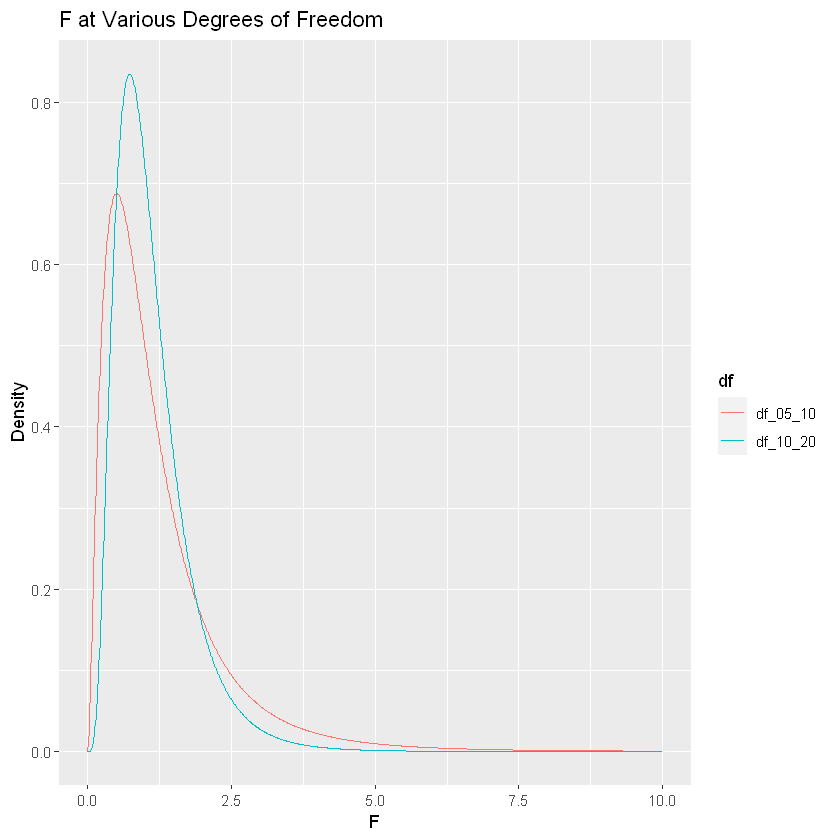

In [34]:
library(dplyr)
library(ggplot2)
library(tidyr)

data.frame(f = 0:1000 / 100) %>% 
           mutate(df_10_20 = df(x = f, df1 = 10, df2 = 20),
                  df_05_10 = df(x = f, df1 = 5, df2 = 10)) %>%
  gather(key = "df", value = "density", -f) %>%
ggplot() +
  geom_line(aes(x = f, y = density, color = df)) +
  labs(title = "F at Various Degrees of Freedom",
       x = "F",
       y = "Density") 